In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

df = pd.read_csv('C:/Users/G/OneDrive/Documentos/dataset/base_datos_2008.csv')

In [2]:
df = df.dropna(subset = ['ArrDelay'])
df = df.sample(frac = 1).head(100000)
Y = df[['ArrDelay']]
X = df[['DepDelay']]

In [3]:
regr = linear_model.LinearRegression()
regr.fit(X,Y)

print(f'Coeficientes: {regr.coef_}')
Y_pred = regr.predict(X)
print(f'R cuadrado: {r2_score(Y,Y_pred)}')

Coeficientes: [[1.01833919]]
R cuadrado: 0.870088675998762


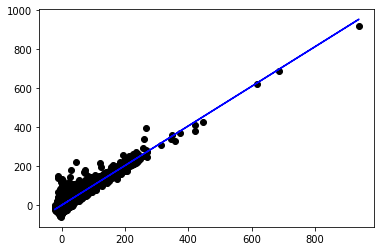

In [5]:
plt.scatter(X[1:10000], Y[1:10000], color = 'black')
plt.plot(X[1:10000], Y_pred[1:10000], color = 'blue')

plt.show()

## Predecir valores de variables categoricas

In [7]:
X = df[['AirTime', 'Distance', 'TaxiIn', 'TaxiOut']]

df['Month'] = df['Month'].apply(str)
df['DayofMonth'] = df['DayofMonth'].apply(str)
df['DayOfWeek'] = df['DayOfWeek'].apply(str)

dummies = pd.get_dummies(data = df[['Month', 'DayofMonth', 'DayOfWeek', 'Origin', 'Dest']])
X = dummies.add(X, fill_value = 0)

In [8]:
X.columns

Index(['AirTime', 'DayOfWeek_1', 'DayOfWeek_2', 'DayOfWeek_3', 'DayOfWeek_4',
       'DayOfWeek_5', 'DayOfWeek_6', 'DayOfWeek_7', 'DayofMonth_1',
       'DayofMonth_10',
       ...
       'Origin_VLD', 'Origin_VPS', 'Origin_WRG', 'Origin_WYS', 'Origin_XNA',
       'Origin_YAK', 'Origin_YKM', 'Origin_YUM', 'TaxiIn', 'TaxiOut'],
      dtype='object', length=651)

In [9]:
regr = linear_model.LinearRegression()
regr.fit(X, Y)

Y_pred = regr.predict(X)
print(f'R cuadrado: {r2_score(Y, Y_pred)}')

R cuadrado: 0.1779395106924181


In [10]:
X = X.add(df[['DepDelay']],fill_value = 0)

In [11]:
regr = linear_model.LinearRegression()
regr.fit(X, Y)

Y_pred = regr.predict(X)
print(f'R Cuadrado: {r2_score(Y, Y_pred)}')

R Cuadrado: 0.9716934524247198
